# Data challenge 1

## The goal of this project is to predict if a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

## Plan:
### 1. Divide data into test and training 
### 2. Exploratory data analysis
### 3. Create new features
### 4. Compare different models using cross validation
####      A. Use F1 to compare models (because I dont want to miss canceour cells, but I also not want to falsely identifiy cells as cancerous) 
### 5. Apply final model to test data and evaluate model performance 
### 6. Discussion 


In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score

pd.options.mode.chained_assignment = None 
cancer_data = pd.read_csv('/Users/rasmussenrogers/Documents/18B/Data-Challenge-1/breast-cancer-wisconsin.csv', header=None)

In [61]:
#fix column names
cancer_data.columns = ['id', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
                       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
                      'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
                      'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 
                      'Class']                                        
                                        

In [62]:
cancer_data['malignant'] = np.where(cancer_data['Class']==4, 1, 0)


In [63]:
X = cancer_data.drop(columns=['id', 'Class', 'malignant']) # define the target variable (dependent variable) as y

In [64]:
y = cancer_data.malignant # define the target variable (dependent variable) as y

## First, make the train test split
#### divide the test and training before creating any features so the test data cant influence the model building

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(559, 9) (559,)
(140, 9) (140,)


In [66]:
y_train.value_counts()

0    366
1    193
Name: malignant, dtype: int64

In [67]:
X_train.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
274,3,1,1,1,2,1,3,2,1
594,4,8,6,3,4,10,7,1,1
495,3,1,1,1,1,1,2,1,1
312,8,6,4,10,10,1,3,5,1
27,5,1,1,1,2,1,2,1,1


In [68]:
X_train.shape

(559, 9)

In [69]:
X_train.describe(include="all")

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,559.000000,559.000000,559.000000,559.000000,559.000000,559,559.000000,559.000000,559.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,325,NaN,NaN,NaN
mean,4.389982,3.150268,3.198569,2.828265,3.246869,NaN,3.416816,2.867621,1.576029
std,2.810944,3.092185,3.009828,2.870413,2.254399,NaN,2.454563,3.084301,1.712551
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,4.000000,3.000000,1.000000


In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 274 to 451
Data columns (total 10 columns):
Clump_Thickness                559 non-null int64
Uniformity_of_Cell_Size        559 non-null int64
Uniformity_of_Cell_Shape       559 non-null int64
Marginal_Adhesion              559 non-null int64
Single_Epithelial_Cell_Size    559 non-null int64
Bare_Nuclei                    559 non-null object
Bland_Chromatin                559 non-null int64
Normal_Nucleoli                559 non-null int64
Mitoses                        559 non-null int64
Bare_Nuclei_num                546 non-null float64
dtypes: float64(1), int64(8), object(1)
memory usage: 48.0+ KB


In [73]:
X_train['Bare_Nuclei_num']=pd.to_numeric(X_train['Bare_Nuclei'], errors='coerce')


In [74]:
pd.crosstab(X_train.Bare_Nuclei_num, X_train.Bare_Nuclei, margins=True, dropna = False)

Bare_Nuclei,1,10,2,3,4,5,6,7,8,9,?,All
Bare_Nuclei_num,,,,,,,,,,,,
1.0,325,0,0,0,0,0,0,0,0,0,0,325
2.0,0,0,27,0,0,0,0,0,0,0,0,27
3.0,0,0,0,19,0,0,0,0,0,0,0,19
4.0,0,0,0,0,11,0,0,0,0,0,0,11
5.0,0,0,0,0,0,23,0,0,0,0,0,23
6.0,0,0,0,0,0,0,3,0,0,0,0,3
7.0,0,0,0,0,0,0,0,5,0,0,0,5
8.0,0,0,0,0,0,0,0,0,16,0,0,16
9.0,0,0,0,0,0,0,0,0,0,7,0,7


In [75]:
X_train['Bare_Nuclei_num'].describe()

count    546.000000
mean       3.551282
std        3.688082
min        1.000000
25%        1.000000
50%        1.000000
75%        7.000000
max       10.000000
Name: Bare_Nuclei_num, dtype: float64

### the Bare_Nuclei column has missing data, coded as "?"

In [76]:
X_train_numeric = X_train.drop(columns=['Bare_Nuclei'])

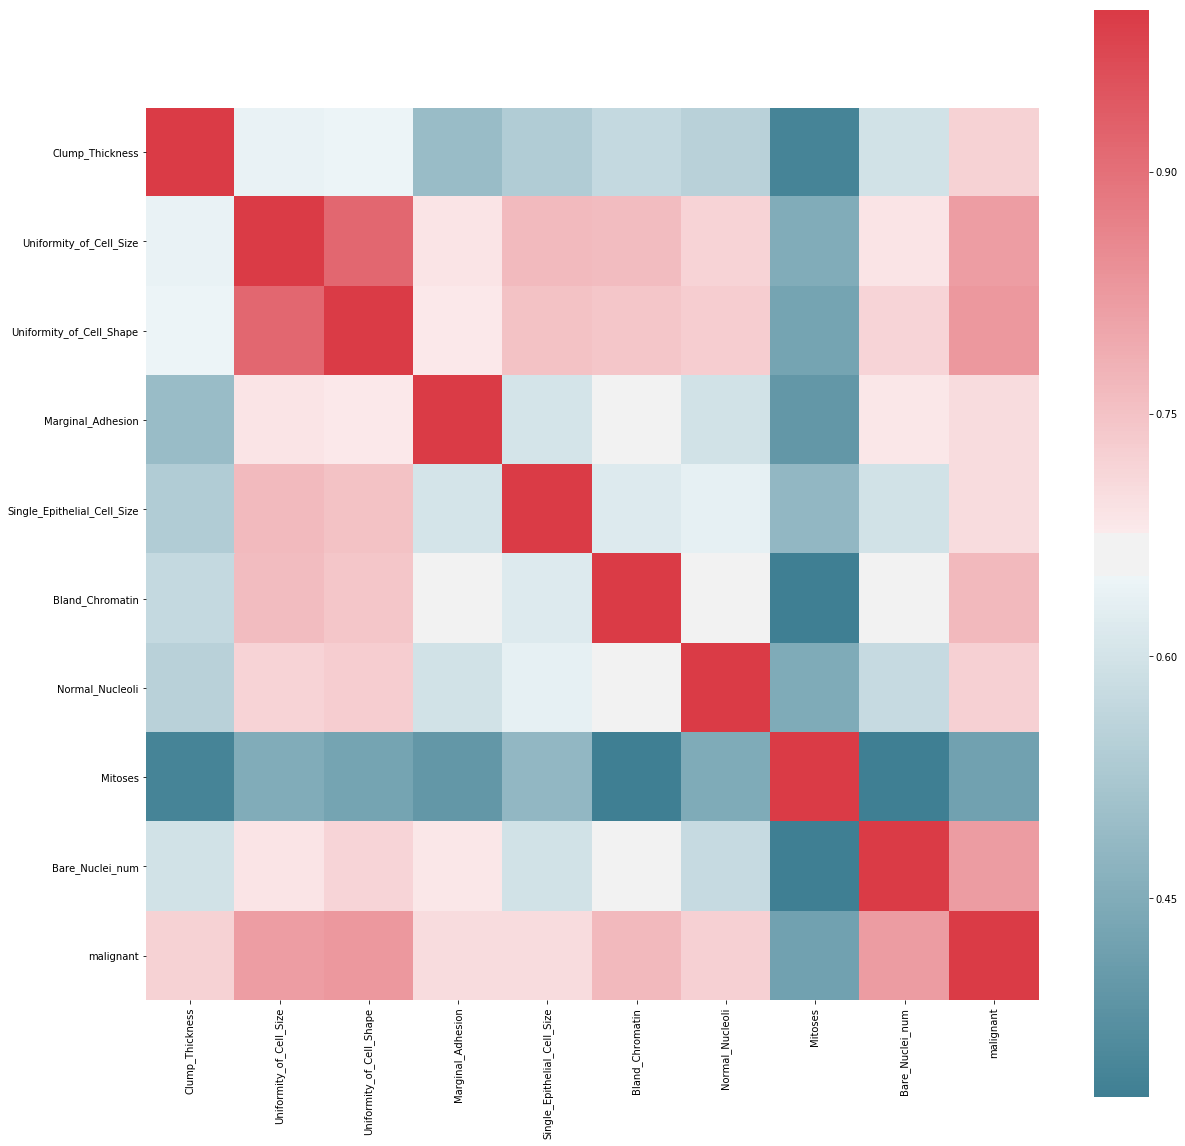

In [77]:
f, ax = plt.subplots(figsize=(20, 20))
corr = pd.concat([X_train_numeric, y], axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

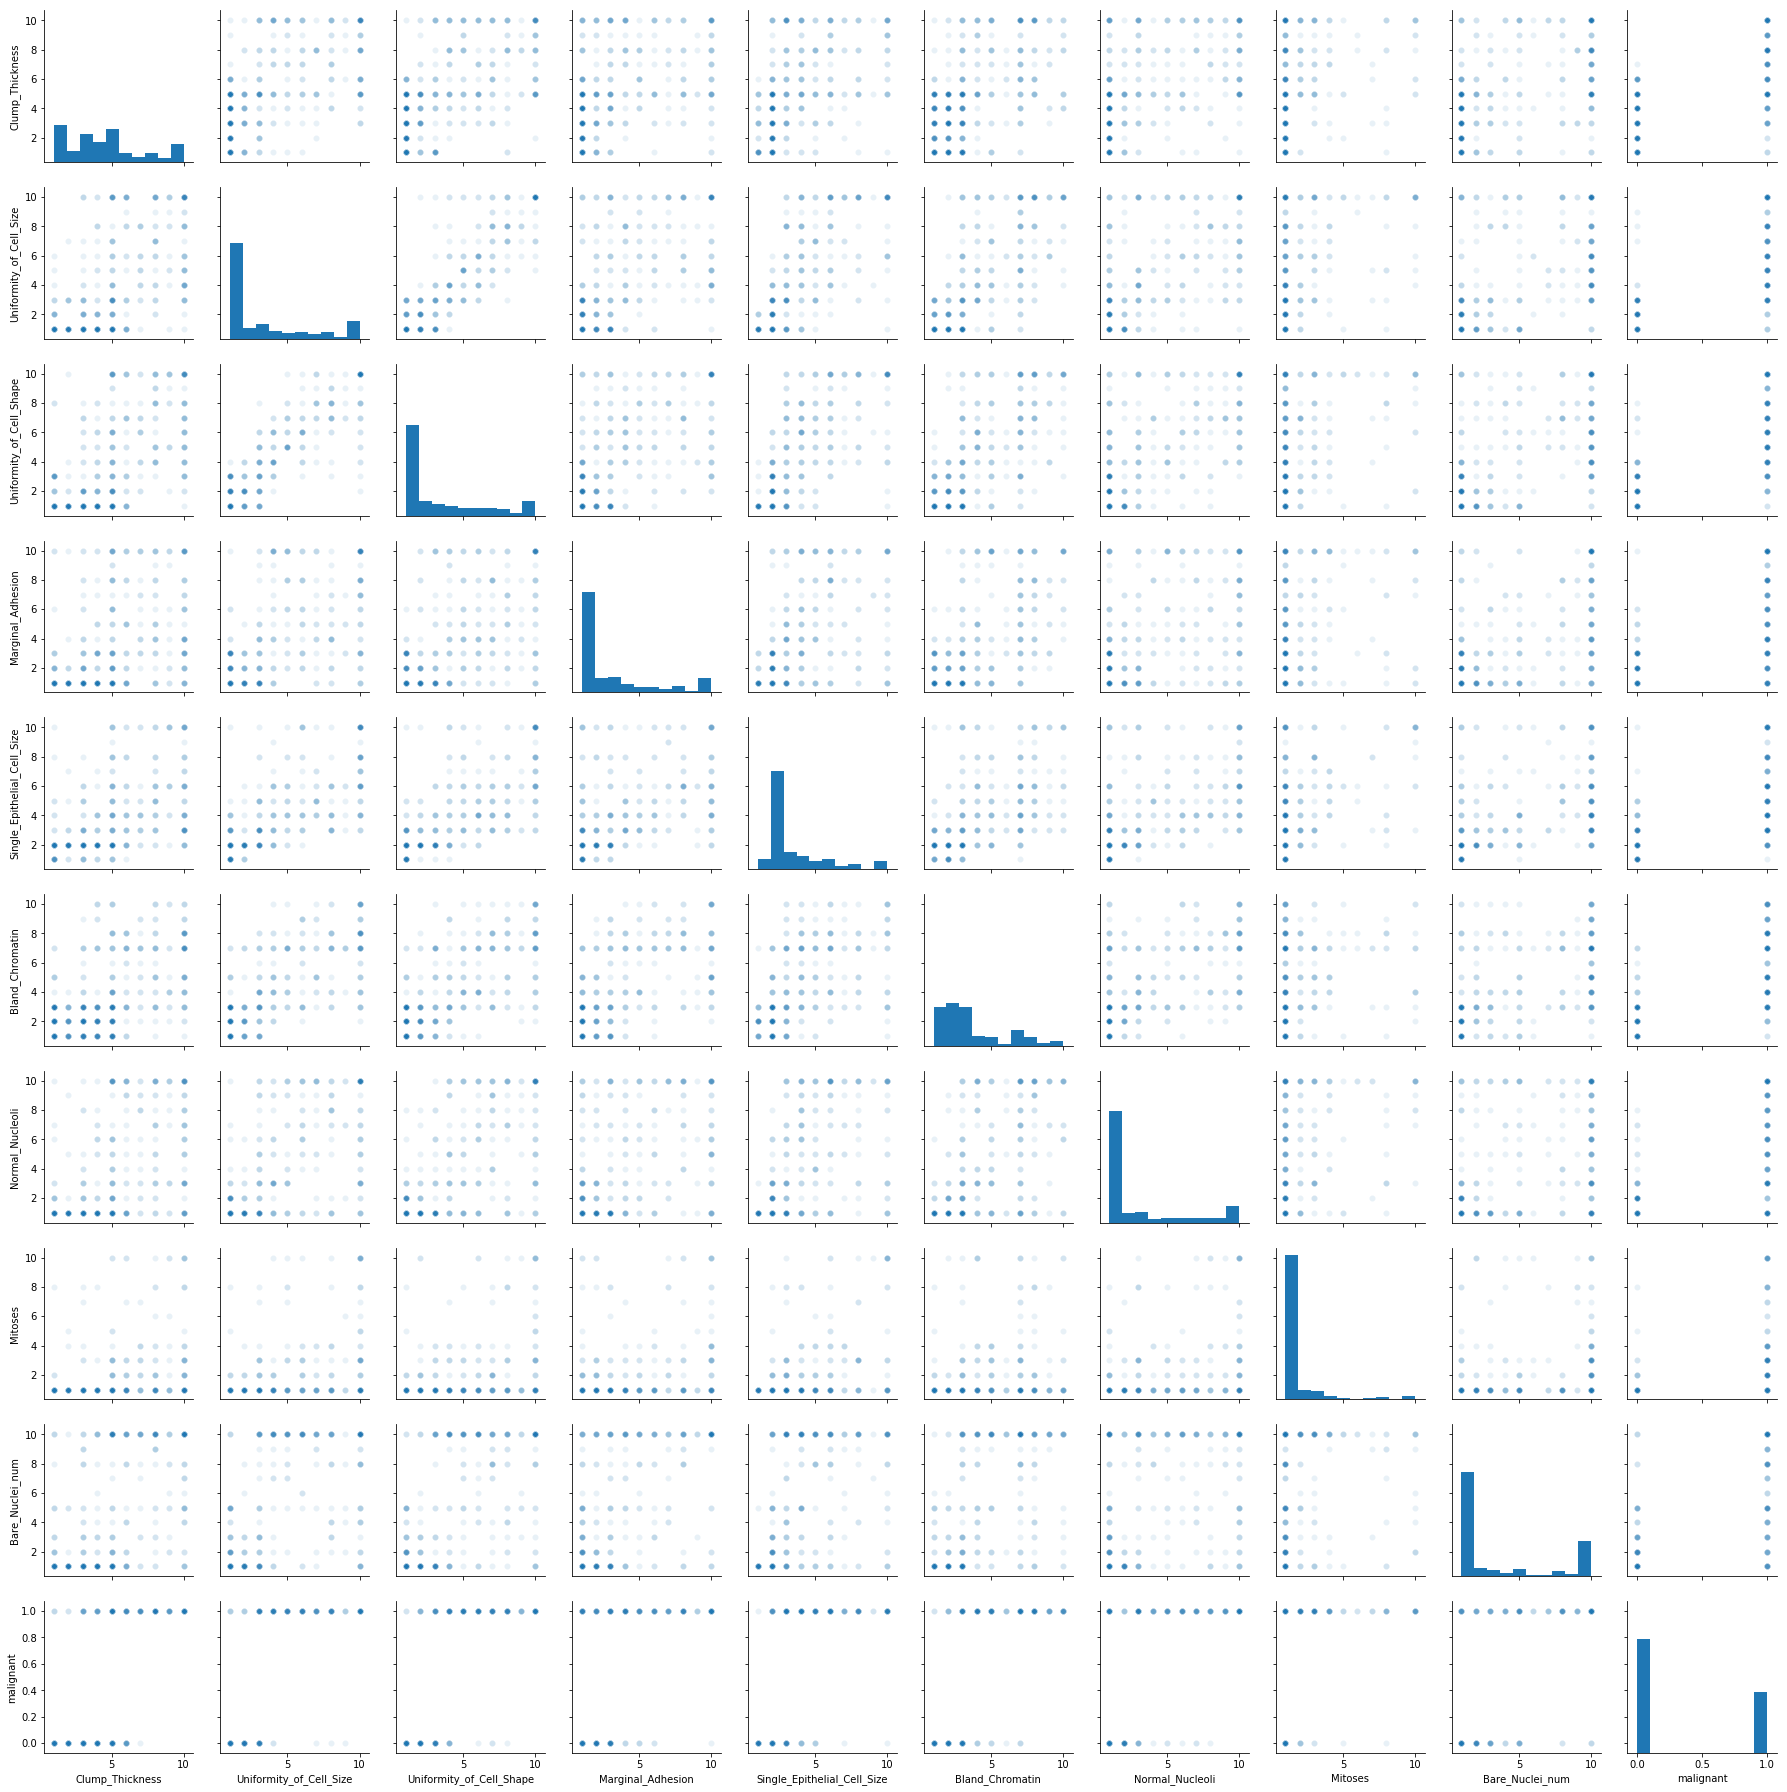

In [78]:
g = sns.pairplot(pd.concat([X_train_numeric, y_train], axis=1).dropna(), plot_kws=dict(alpha= 0.1))


### several variables have category with most observations and very few observations in other categories 
#### Make a list of variables where 50% or more of rows are a single value 

In [79]:
vars=X_train_numeric.columns.values
list_maj = []
list_min = []
for v in vars:
    mode=X_train[v].mode()[0]
    count = X_train[(X_train[v] == mode) ]
    precent_maj=len(count.index)/len(X_train.index)
    if precent_maj > .5:
        list_maj.append(v)
    else:
        list_min.append(v)


## options for the column with missing data: replace with mean, median, missing indicator, drop column

In [80]:
X_train['Bare_Nuclei_median'] = X_train['Bare_Nuclei_num'].fillna(X_train['Bare_Nuclei_num'].median())


In [81]:
X_train['Bare_Nuclei_mean'] = X_train['Bare_Nuclei_num'].fillna(X_train['Bare_Nuclei_num'].mean())


## feature engineering 
#### make all variables categorial at the median


In [82]:
var = ['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Bare_Nuclei_median']
for v in var:  
    var_bin = v + "_bin"
    X_train[var_bin] = np.where(X_train[v]>=X_train[v].median(), 1, 0)


## Compare models and imputed variables as continuous / categorical 

In [84]:
#create dataframes with binary, mean imputed, median imputed, and dropped vars 
X_train_bin = X_train.loc[:, X_train.columns.str.contains('bin')]
X_train_bin_var=list(X_train_bin)
X_train_mean = X_train.drop(columns=['Bare_Nuclei', 'Bare_Nuclei_num', 'Bare_Nuclei_median']+ X_train_bin_var)
X_train_median = X_train.drop(columns=['Bare_Nuclei', 'Bare_Nuclei_num', 'Bare_Nuclei_mean']+ X_train_bin_var)
X_train_dropped = X_train.drop(columns=['Bare_Nuclei', 'Bare_Nuclei_num', 'Bare_Nuclei_median', 'Bare_Nuclei_mean']+ X_train_bin_var)




In [85]:
#create a dataset with binary just for variables with one really big column
min_drop = [x + "_bin" for x in list_min]
X_train_maj_bin = X_train.drop(columns=['Bare_Nuclei', 'Bare_Nuclei_median', 'Bare_Nuclei_mean']+ min_drop+list_maj)


In [86]:
def modelfit_compare(X1):
    logreg_L2 = LogisticRegression(penalty='l2')
    logreg_L1 = LogisticRegression(penalty='l1')
    rf = RandomForestClassifier(random_state=0, max_depth=3, n_estimators=500)
    
    models = (logreg_L2, rf, logreg_L1)
    model_names = ("logistic L2", "random forest", "logistic L1")
    for m, n in zip(models, model_names):
        
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        scoring = 'f1'
        results = model_selection.cross_val_score(m, X1, y_train, cv=kfold, scoring=scoring)
        print(n, "10-fold cross validation average F1 score: %.3f" % (results.mean()))
        

In [87]:
modelfit_compare(X_train_bin)

logistic L2 10-fold cross validation average F1 score: 0.828
random forest 10-fold cross validation average F1 score: 0.832
logistic L1 10-fold cross validation average F1 score: 0.828


In [88]:
modelfit_compare(X_train_mean)

logistic L2 10-fold cross validation average F1 score: 0.946
random forest 10-fold cross validation average F1 score: 0.955
logistic L1 10-fold cross validation average F1 score: 0.949


In [89]:
modelfit_compare(X_train_median)

logistic L2 10-fold cross validation average F1 score: 0.944
random forest 10-fold cross validation average F1 score: 0.960
logistic L1 10-fold cross validation average F1 score: 0.952


In [90]:
modelfit_compare(X_train_dropped)

logistic L2 10-fold cross validation average F1 score: 0.954
random forest 10-fold cross validation average F1 score: 0.951
logistic L1 10-fold cross validation average F1 score: 0.944


In [91]:
modelfit_compare(X_train_maj_bin)

logistic L2 10-fold cross validation average F1 score: 0.922
random forest 10-fold cross validation average F1 score: 0.926
logistic L1 10-fold cross validation average F1 score: 0.922


### Random forest performed the best 
#### create a random forest model applied to the whole training data

In [92]:
rf_final = RandomForestClassifier(random_state=0, max_depth=3, n_estimators=500)
rf_final.fit(X_train_median, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### apply final model to test data and print confusion matrix

In [93]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ("0", "1"), rotation=45)
    plt.yticks(tick_marks, ("0", "1"))


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [94]:
X_test['Bare_Nuclei_num']=pd.to_numeric(X_test['Bare_Nuclei'], errors='coerce')
X_test['Bare_Nuclei_median'] = X_test['Bare_Nuclei_num'].fillna(X_test['Bare_Nuclei_num'].median())
X_test_median = X_test.drop(columns=['Bare_Nuclei', 'Bare_Nuclei_num'])



In [95]:
rf_final_pred_test = rf_final.predict(X_test_median)


Normalized confusion matrix
[[0.95 0.05]
 [0.04 0.96]]


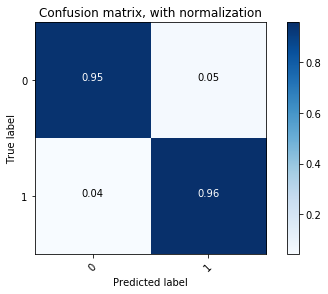

In [96]:
cnf_matrix = confusion_matrix(y_test, rf_final_pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
title='Confusion matrix, with normalization')

In [102]:
print("f1 score", f1_score(y_test, rf_final_pred_test))
print("recall", recall_score(y_test, rf_final_pred_test))
print("precision", precision_score(y_test, rf_final_pred_test))

f1 score 0.9292929292929293
recall 0.9583333333333334
precision 0.9019607843137255


In [111]:
feature_importances = pd.DataFrame(rf_final.feature_importances_,
                                   index = X_test_median.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Uniformity_of_Cell_Size,0.261377
Uniformity_of_Cell_Shape,0.244104
Bland_Chromatin,0.137261
Bare_Nuclei_median,0.129467
Single_Epithelial_Cell_Size,0.099405
Normal_Nucleoli,0.073176
Clump_Thickness,0.037879
Marginal_Adhesion,0.014589
Mitoses,0.002741


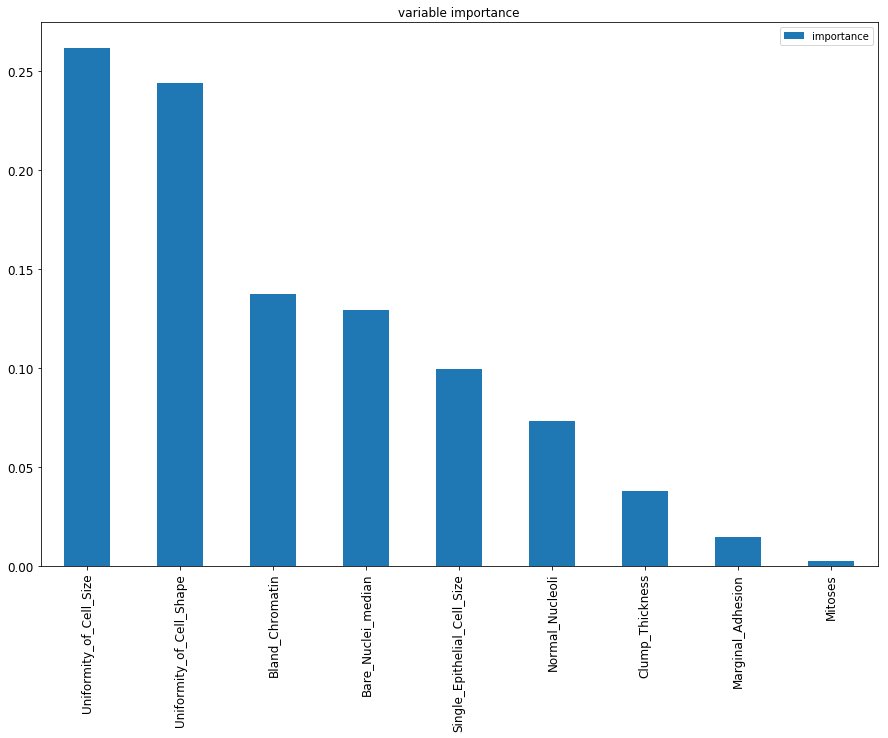

In [110]:
ax = feature_importances.plot(kind='bar', title ="variable importance", figsize=(15, 10), fontsize=12)


# Discussion
I divided the model into training and test to start. I made the features binary and compared a logistic regression with L1 regularization, logistic regression with L2 regularization, and random forest classifer. I evaluated model performance in cross validation on F1 score. The random forest classifier using median value for the column with missing values performed best. I then applied this model to the test data.

The most important feature in the random forest model was Uniformity of Cell_Size, followed closely by Uniformity of Cell Shape. 

In the test data, the model had an f1 score of 0.92. The model's recall (0.96) was higher than its precision (0.90). 

With more time, I would tune the model's hyperparameters, including tree depth and minimum samples per leaf.

With more information about what the model would be used for, I could choose a different point along the model's ROC curve. For example, if the cost for missing a case is high (for example, the disease is fatal but treatment exists, or disease easily spreads), I would want to maximize true positives by choosing a cut-point with high sensitivity. However, if the followup testing or treatment after this screening was very expensive or invasive, I would want to minimize false positives by choosing a cut-point with high specificity. 
